### 라이브러리 불러오기

In [ ]:
#라이브러리 설치
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy
!pip install yellowbrick

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "AppleGothic"

In [2]:
df = pd.read_csv('2조Data.csv', encoding='cp949',thousands=',')
df = df.dropna()
df

,호선,역이름,무임승하차비율,무임승하차,유임승하차,출퇴근시간 이용객수,출퇴근시간 제외한 이용객수,역간거리(km),지역,행정동,...,자동차수,통근 통학시 지하철 이용 비율,250m내 버스정류장 수,자치구별 지하철역 개수,자동차세,재산세,지방소득세(2020),지역별 기초수급자 비율,차 1대당 석유사용량,"2020 세금평균(자동차, 재산,지방소득)"
0,1호선,동대문,29.746110,256357.72050,6.054616e+05,201212.7912,6.684911e+05,0.60,종로구,창신동,...,50533.0,30.4,5.0,15.0,9781,101544,464908,0.002775,0.2675,192078.0
1,1호선,동묘앞,46.742445,285406.89250,3.251878e+05,139446.4615,4.594895e+05,0.70,종로구,숭인동,...,50533.0,30.4,8.0,15.0,9781,101544,464908,0.003191,0.2675,192078.0
2,1호선,서울역,13.291690,392607.18280,2.561172e+06,965310.6264,2.019218e+06,1.10,중구,회현동,...,58919.0,41.1,10.0,24.0,10353,150957,853522,0.003666,1.2096,338277.0
3,1호선,시청,13.331403,183237.73120,1.191244e+06,522431.5495,8.439801e+05,1.00,중구,소곡동,...,58919.0,41.1,7.0,24.0,10353,150957,853522,0.000388,1.2096,338277.0
4,1호선,신설동,25.844703,225766.44080,6.477837e+05,301949.8242,5.763451e+05,0.90,동대문구,용신동,...,98441.0,32.1,11.0,14.0,18247,68342,59508,0.004825,0.5779,48699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,9호선,종합운동장,10.546618,29029.72043,2.462218e+05,82127.0000,1.701470e+05,0.95,송파구,"잠실2,7동",...,249843.0,42.7,2.0,29.0,50715,309537,363480,0.000035,0.7149,241244.0
294,9호선,중앙보훈병원,28.942928,126206.29090,3.098460e+05,195012.0000,3.519100e+05,1.14,강동구,둔촌동,...,152283.0,38.2,5.0,13.0,27354,117372,99745,0.001188,0.3162,81490.0
295,9호선,증미,20.008393,79732.61291,3.187632e+05,155765.2418,2.490532e+05,0.70,강서구,가양3동,...,207008.0,36.1,3.0,23.0,35002,115943,143479,0.004130,3.3344,98141.0
296,9호선,한성백제,19.469076,23511.60000,9.725222e+04,49416.0000,9.538300e+04,1.14,송파구,방이2동,...,249843.0,42.7,3.0,29.0,50715,309537,363480,0.001426,0.7149,241244.0


### 군집화(K-means)

In [3]:
# 이전에 설정한 변수들만 남겨서 군집화 진행

col = ['2020 세금평균(자동차, 재산,지방소득)','노인인구수','무임승하차','무임승하차비율', '유임승하차',
       '출퇴근시간 이용객수', '노인인구비율', '지역별 기초수급자 비율', '자치구별 재난지원금 대상자 비율 ',
    '250m내 버스정류장 수','인구밀도 (명/㎢)','평균연령']

df1 = df.loc[:,col]

In [4]:
X = df1.drop(columns=['무임승하차'])

In [5]:
X

,"2020 세금평균(자동차, 재산,지방소득)",노인인구수,무임승하차비율,유임승하차,출퇴근시간 이용객수,노인인구비율,지역별 기초수급자 비율,자치구별 재난지원금 대상자 비율,250m내 버스정류장 수,인구밀도 (명/㎢),평균연령
0,192078.0,1432.333333,29.746110,6.054616e+05,201212.7912,0.204215,0.002775,70.2,5.0,6431.0,48.70
1,192078.0,1690.000000,46.742445,3.251878e+05,139446.4615,0.179684,0.003191,70.2,8.0,6431.0,44.70
2,338277.0,1397.000000,13.291690,2.561172e+06,965310.6264,0.258895,0.003666,73.1,10.0,13231.0,51.20
3,338277.0,305.000000,13.331403,1.191244e+06,522431.5495,0.088844,0.000388,73.1,7.0,13231.0,41.40
4,48699.0,5900.000000,25.844703,6.477837e+05,301949.8242,0.172545,0.004825,80.7,11.0,24762.0,44.40
...,...,...,...,...,...,...,...,...,...,...,...
293,241244.0,3017.500000,10.546618,2.462218e+05,82127.0000,0.170317,0.000035,62.1,2.0,19599.0,42.45
294,81490.0,4225.000000,28.942928,3.098460e+05,195012.0000,0.226155,0.001188,75.7,5.0,18970.0,44.10
295,98141.0,3781.000000,20.008393,3.187632e+05,155765.2418,0.253350,0.004130,81.1,3.0,13986.0,48.70
296,241244.0,3568.000000,19.469076,9.725222e+04,49416.0000,0.132976,0.001426,62.1,3.0,19599.0,42.20


In [6]:
# K-means 활용하여 군집화

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wss = []
sis = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wss = np.append(wss, kmeans.inertia_)

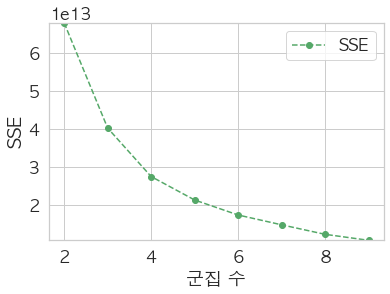

In [7]:
fig, ax = plt.subplots()
line = ax.plot(np.arange(2,10), wss, 'go--', label='SSE')
ax.set_ylim(wss.min(), wss.max())
ax.set_xlabel('군집 수')
ax.set_ylabel('SSE')
labels = [l.get_label() for l in line]
plt.legend(line, labels)
plt.show()

# 최적의 군집 수 3 확인

In [8]:
best_k = 3

kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

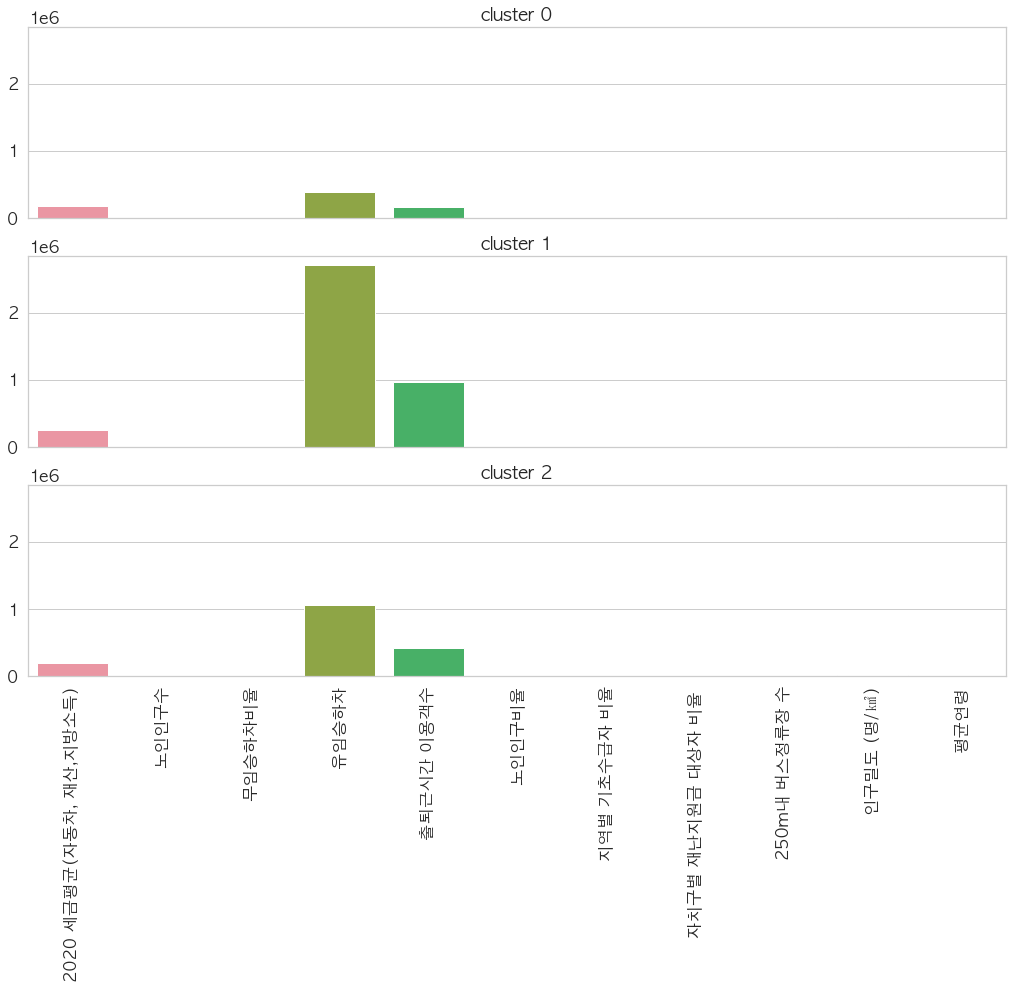

In [9]:
fig, ax = plt.subplots(best_k, 1, figsize=(15,10), sharex=True, sharey=True)
ax = ax.ravel()
plt.tight_layout() 
plt.subplots_adjust(hspace=0.2)

for i in range(kmeans.n_clusters):
    ax[i].set_title('cluster %d' % i)
    sns.barplot(x=np.arange(X.columns.size), y=kmeans.cluster_centers_[i], ax=ax[i])
    ax[i].set_xticks(np.arange(X.columns.size))
    ax[i].set_xticklabels(X.columns, rotation=90)

(-1.1124225818383093,
 1.1070357612926556,
 -1.1027990298074133,
 1.1121442519329345)

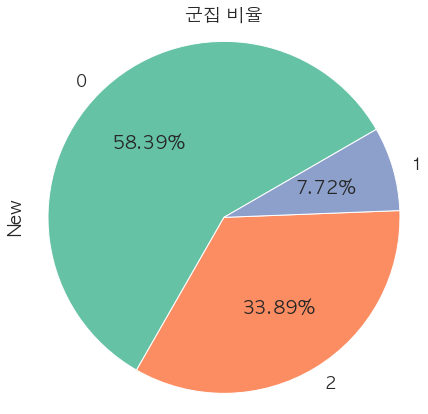

In [10]:
#각 군집의 비율 확인
df1['New'] = kmeans.labels_

plt.figure(figsize=(6,6))
df1.New.value_counts().plot.pie(autopct='%.2f%%', figsize=(7,7),
                                startangle=30, legend=False)
plt.title('군집 비율')
plt.axis('equal')

In [11]:
df1['New'] = kmeans.labels_

In [12]:
# 그래프 사진으로 저장하기 위해 만든 함수
# 각 그래프 시각화 하기

def make_fig(column):
    df1.groupby('New')[column].mean().plot(kind = 'bar')
    print(df1.groupby('New')[column].mean())
    for k in range(len(df1.groupby('New')[column].mean().values)):
        height = df1.groupby('New')[column].mean().values[k]
        plt.text(df1.groupby('New')[column].mean().index[k], height+0.25, '%.0f' % height, size=15, ha='center', va='bottom')
    plt.xticks(rotation=360)
    plt.title(column)
    # plt.savefig(column+'.png', bbox_inches="tight");

In [13]:
# 소수점 둘째 자리까지

def make_fig2(column):
    df1.groupby('New')[column].mean().plot(kind = 'bar')
    print(df1.groupby('New')[column].mean())
    for k in range(len(df1.groupby('New')[column].mean().values)):
        height = df1.groupby('New')[column].mean().values[k]
        plt.text(df1.groupby('New')[column].mean().index[k], height, '%.2f' % height, size=15, ha='center', va='bottom')
    plt.xticks(rotation=360)
    plt.title(column)
    # plt.savefig(column+'.png', bbox_inches="tight");

In [14]:
# 소수점 네째 자리까지

def make_fig3(column):
    df1.groupby('New')[column].mean().plot(kind = 'bar')
    print(df1.groupby('New')[column].mean())
    for k in range(len(df1.groupby('New')[column].mean().values)):
        height = df1.groupby('New')[column].mean().values[k]
        plt.text(df1.groupby('New')[column].mean().index[k], height, '%.4f' % height, size=15, ha='center', va='bottom')
    plt.xticks(rotation=360)
    plt.title(column)
    # plt.savefig(column+'.png', bbox_inches="tight");

### 군집별로 각 column 막대 그래프 확인하기

New
0     90138.768929
1    299864.240522
2    189413.024943
Name: 무임승하차, dtype: float64


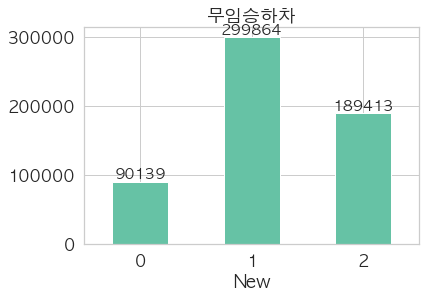

In [15]:
make_fig('무임승하차')

In [16]:
df1.columns

Index(['2020 세금평균(자동차, 재산,지방소득)', '노인인구수', '무임승하차', '무임승하차비율', '유임승하차',
       '출퇴근시간 이용객수', '노인인구비율', '지역별 기초수급자 비율', '자치구별 재난지원금 대상자 비율 ',
       '250m내 버스정류장 수', '인구밀도 (명/㎢)', '평균연령', 'New'],
      dtype='object')

New
0    173319.172414
1    254616.956522
2    191310.900990
Name: 2020 세금평균(자동차, 재산,지방소득), dtype: float64


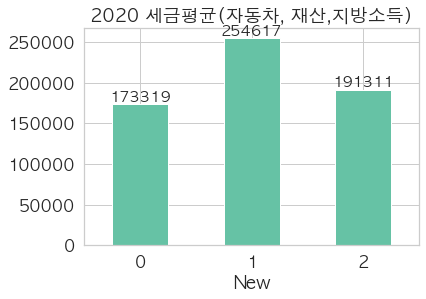

In [17]:
make_fig('2020 세금평균(자동차, 재산,지방소득)')

New
0    3943.043968
1    2983.540580
2    3757.675413
Name: 노인인구수, dtype: float64


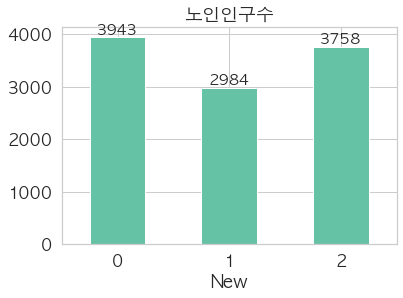

In [18]:
make_fig('노인인구수')

New
0     90138.768929
1    299864.240522
2    189413.024943
Name: 무임승하차, dtype: float64


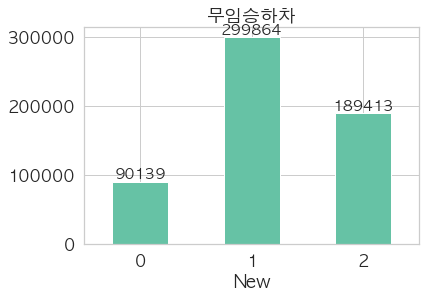

In [19]:
make_fig('무임승하차')

New
0    18.811032
1    10.317926
2    14.968887
Name: 무임승하차비율, dtype: float64


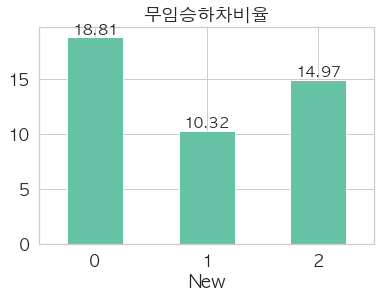

In [20]:
make_fig2('무임승하차비율')

New
0    3.836637e+05
1    2.701878e+06
2    1.053463e+06
Name: 유임승하차, dtype: float64


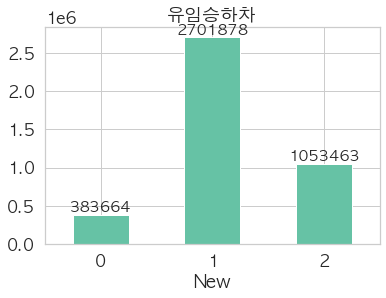

In [21]:
make_fig('유임승하차')

New
0    160225.101940
1    975945.773178
2    415164.843492
Name: 출퇴근시간 이용객수, dtype: float64


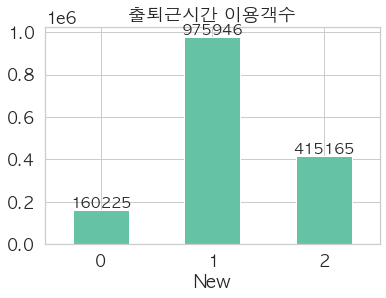

In [22]:
make_fig('출퇴근시간 이용객수')

New
0    0.168075
1    0.147992
2    0.170031
Name: 노인인구비율, dtype: float64


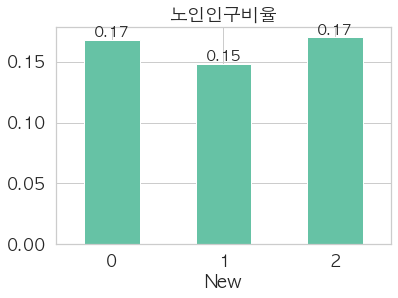

In [23]:
make_fig2('노인인구비율')

New
0    0.002227
1    0.001691
2    0.002117
Name: 지역별 기초수급자 비율, dtype: float64


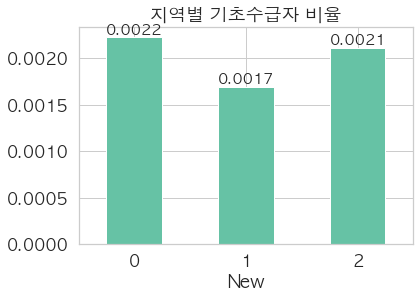

In [24]:
make_fig3('지역별 기초수급자 비율')

New
0    70.974713
1    66.647826
2    71.000990
Name: 자치구별 재난지원금 대상자 비율 , dtype: float64


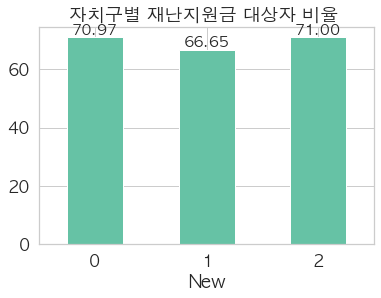

In [25]:
make_fig2('자치구별 재난지원금 대상자 비율 ')

New
0     7.005747
1    11.130435
2     8.673267
Name: 250m내 버스정류장 수, dtype: float64


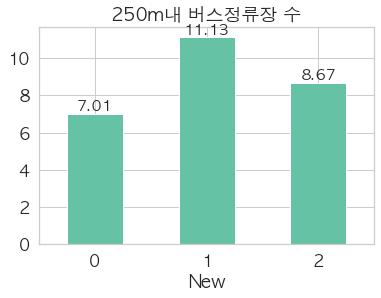

In [26]:
make_fig2('250m내 버스정류장 수')

New
0    16545.534483
1    14786.043478
2    16039.910891
Name: 인구밀도 (명/㎢), dtype: float64


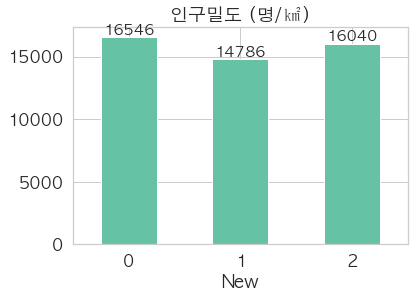

In [27]:
make_fig('인구밀도 (명/㎢)')

New
0    43.768611
1    42.458551
2    44.293449
Name: 평균연령, dtype: float64


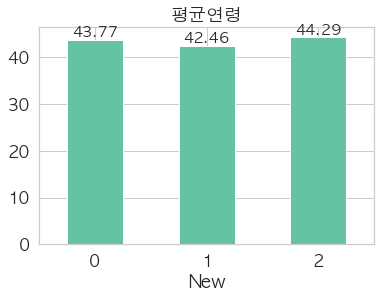

In [28]:
make_fig2('평균연령')

In [28]:
df1

,"2020 세금평균(자동차, 재산,지방소득)",노인인구수,무임승하차,무임승하차비율,유임승하차,출퇴근시간 이용객수,노인인구비율,지역별 기초수급자 비율,자치구별 재난지원금 대상자 비율,250m내 버스정류장 수,인구밀도 (명/㎢),평균연령,New
0,192078.0,1432.333333,256357.72050,29.746110,6.054616e+05,201212.7912,0.204215,0.002775,70.2,5.0,6431.0,48.70,0
1,192078.0,1690.000000,285406.89250,46.742445,3.251878e+05,139446.4615,0.179684,0.003191,70.2,8.0,6431.0,44.70,0
2,338277.0,1397.000000,392607.18280,13.291690,2.561172e+06,965310.6264,0.258895,0.003666,73.1,10.0,13231.0,51.20,1
3,338277.0,305.000000,183237.73120,13.331403,1.191244e+06,522431.5495,0.088844,0.000388,73.1,7.0,13231.0,41.40,2
4,48699.0,5900.000000,225766.44080,25.844703,6.477837e+05,301949.8242,0.172545,0.004825,80.7,11.0,24762.0,44.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,241244.0,3017.500000,29029.72043,10.546618,2.462218e+05,82127.0000,0.170317,0.000035,62.1,2.0,19599.0,42.45,0
294,81490.0,4225.000000,126206.29090,28.942928,3.098460e+05,195012.0000,0.226155,0.001188,75.7,5.0,18970.0,44.10,0
295,98141.0,3781.000000,79732.61291,20.008393,3.187632e+05,155765.2418,0.253350,0.004130,81.1,3.0,13986.0,48.70,0
296,241244.0,3568.000000,23511.60000,19.469076,9.725222e+04,49416.0000,0.132976,0.001426,62.1,3.0,19599.0,42.20,0


In [29]:
df1.insert(0, '호선', df['호선'])
df1.insert(0, '역이름', df['역이름'])

df1 = df1.set_index('역이름')

In [30]:
df1

,호선,"2020 세금평균(자동차, 재산,지방소득)",노인인구수,무임승하차,무임승하차비율,유임승하차,출퇴근시간 이용객수,노인인구비율,지역별 기초수급자 비율,자치구별 재난지원금 대상자 비율,250m내 버스정류장 수,인구밀도 (명/㎢),평균연령,New
역이름,,,,,,,,,,,,,,
동대문,1호선,192078.0,1432.333333,256357.72050,29.746110,6.054616e+05,201212.7912,0.204215,0.002775,70.2,5.0,6431.0,48.70,0
동묘앞,1호선,192078.0,1690.000000,285406.89250,46.742445,3.251878e+05,139446.4615,0.179684,0.003191,70.2,8.0,6431.0,44.70,0
서울역,1호선,338277.0,1397.000000,392607.18280,13.291690,2.561172e+06,965310.6264,0.258895,0.003666,73.1,10.0,13231.0,51.20,1
시청,1호선,338277.0,305.000000,183237.73120,13.331403,1.191244e+06,522431.5495,0.088844,0.000388,73.1,7.0,13231.0,41.40,2
신설동,1호선,48699.0,5900.000000,225766.44080,25.844703,6.477837e+05,301949.8242,0.172545,0.004825,80.7,11.0,24762.0,44.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
종합운동장,9호선,241244.0,3017.500000,29029.72043,10.546618,2.462218e+05,82127.0000,0.170317,0.000035,62.1,2.0,19599.0,42.45,0
중앙보훈병원,9호선,81490.0,4225.000000,126206.29090,28.942928,3.098460e+05,195012.0000,0.226155,0.001188,75.7,5.0,18970.0,44.10,0
증미,9호선,98141.0,3781.000000,79732.61291,20.008393,3.187632e+05,155765.2418,0.253350,0.004130,81.1,3.0,13986.0,48.70,0


### 실루엣 계수 확인

In [48]:
from sklearn.metrics import silhouette_samples

score_samples = silhouette_samples(X, df1['New'])
print(score_samples.shape)

df1['Sil_coef'] = score_samples

average_score = silhouette_score(X, df1['New'])
print(average_score)

(298,)
0.49692713146951595


In [49]:
# 군집별 점수 확인
df1.groupby('New')['Sil_coef'].mean()

New
0    0.579222
1    0.415492
2    0.373697
Name: Sil_coef, dtype: float64

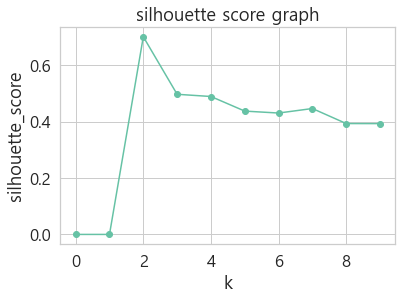

In [50]:
## 실루엣 점수 계산 그래프 그리기
silhouette_score_collection = np.zeros(10)
for i in range(2,10) :
    silhouette_kmeans = KMeans(n_clusters= i)
    y_pred = silhouette_kmeans.fit_predict(X)
    silhouette_kmeans.labels_
    silhouette_score_collection[i] = silhouette_score(X, silhouette_kmeans.labels_)
silhouette_score_collection

silhouette_score_graph = pd.DataFrame(silhouette_score_collection)
plt.plot(silhouette_score_graph, marker = 'o')
plt.title("silhouette score graph")
plt.ylabel("silhouette_score")
plt.xlabel("k")
plt.show()

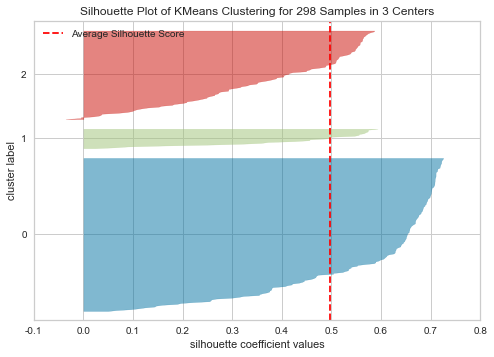

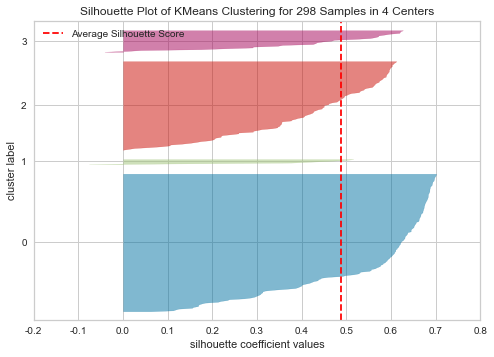

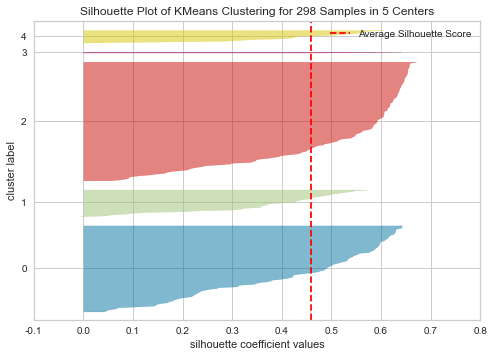

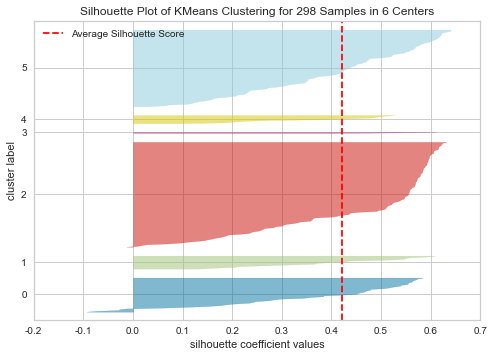

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 298 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, random_state=0))

In [51]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(3, random_state=0), X, colors='yellowbrick')
silhouette_visualizer(KMeans(4, random_state=0), X, colors='yellowbrick')
silhouette_visualizer(KMeans(5, random_state=0), X, colors='yellowbrick')
silhouette_visualizer(KMeans(6, random_state=0), X, colors='yellowbrick')